In [4]:
include("../mps.jl")
using .MatrixProductState
using LinearAlgebra
using Images

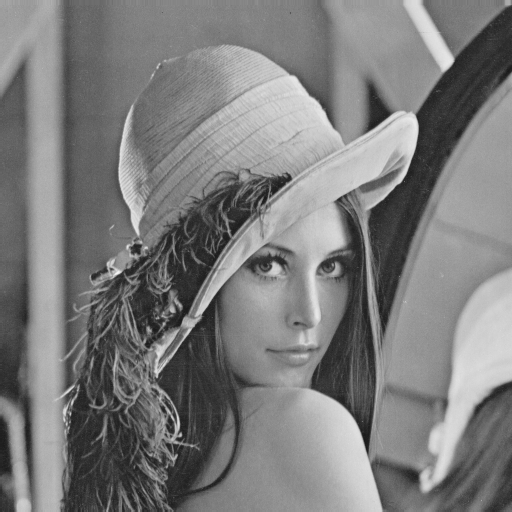

In [5]:
lenna = load("./lena512.bmp")

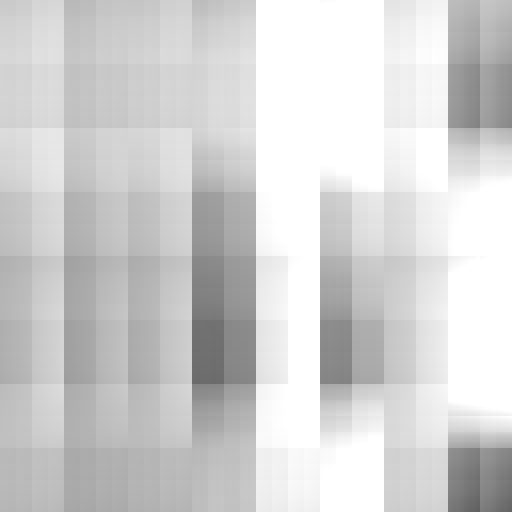

Bond dimension 2
(512, 512)

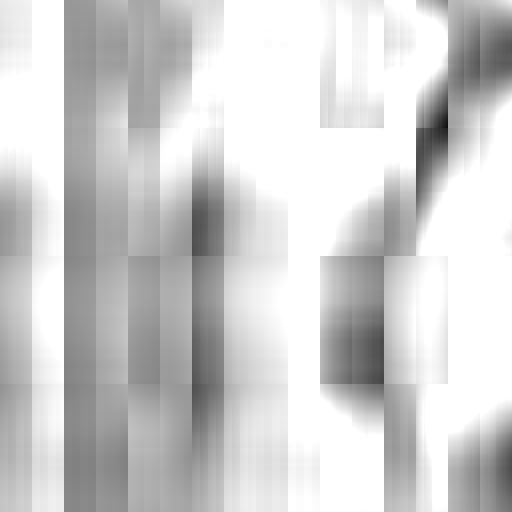

Bond dimension 4
(512, 512)

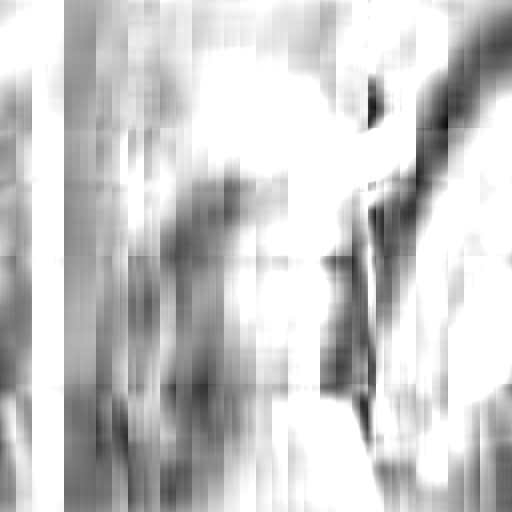

Bond dimension 9
(512, 512)

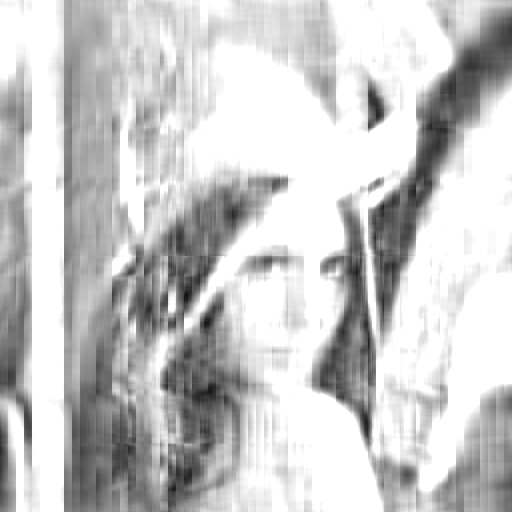

Bond dimension 18
(512, 512)

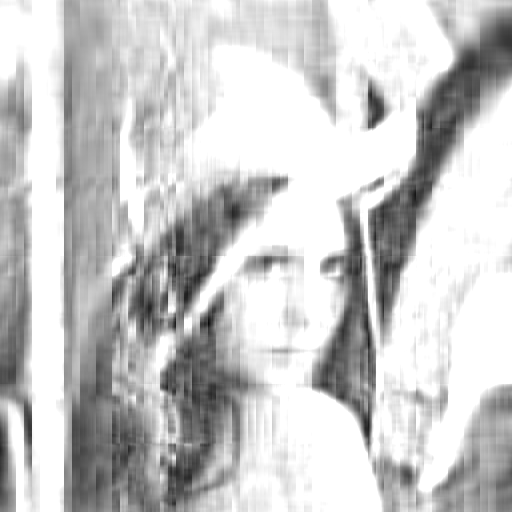

Bond dimension 20
(512, 512)

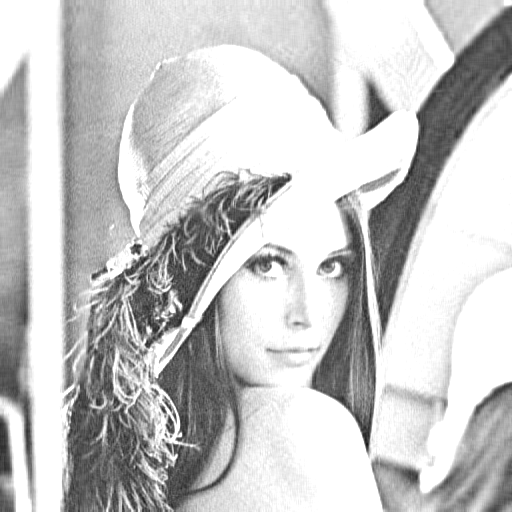

Bond dimension 100
(512, 512)

In [7]:
function mps_reduce_lenna(bond_dim)
    lenna_grayscale = map(x->norm([x.r, x.g, x.b]), lenna)
    print(size(lenna_grayscale))
    lenna_tensor = reshape(lenna_grayscale, (2 for _=1:log2(512^2))...)
    sites = MatrixProductState.mps(lenna_tensor, bond_dim)
    r=trunc(Int, log2(512^2))
    axis_dim = div(length(sites[2]), 2)
    intermediate = reshape(sites[2], axis_dim, 2) * sites[1]
    for i=2:r-2
        axis_dim = size(sites[i+1])[3]
        left_axis_dim = div(length(sites[i+1]), axis_dim)
        right_axis_dim = div(length(intermediate), axis_dim)
        intermediate = reshape(sites[i+1], left_axis_dim, axis_dim) *
            reshape(intermediate, axis_dim, right_axis_dim)
    end
    lenna_mps = sites[r] * reshape(intermediate, 2, 2^(r-1))
    lenna_mps = reshape(lenna_mps, 512, 512)
    lenna_mps_res = map(x->RGB(x,x,x), lenna_mps)
    return lenna_mps_res
end

for i=[2,4,9,18,20,100]
    println("Bond dimension " * string(i))
    display(mps_reduce_lenna(i))
end